In [1]:
import torch
from torch import nn
from torchvision import transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [2]:
from utils import Generator, Discriminator
from utils import Trainer

In [3]:
G = Generator(in_features=64, hid_features=128, out_features=784).to(device)
G_optimizer = torch.optim.Adam(G.parameters(), lr=0.00001)

D = Discriminator(in_features=784, hid_features=128).to(device) 
D_optimizer = torch.optim.Adam(D.parameters(), lr=0.00001)

In [4]:
criterion = nn.BCEWithLogitsLoss()

In [5]:
dataset = MNIST('.', download=True, transform=transforms.ToTensor())
generator = DataLoader(dataset, batch_size=128, shuffle=True)

In [6]:
trainer = Trainer(G, D, G_optimizer, D_optimizer, criterion, device)

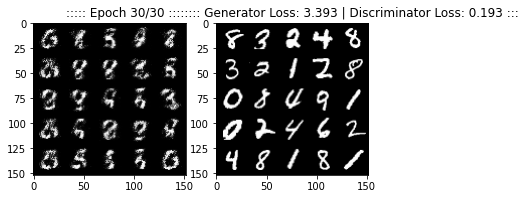

In [7]:
trainer.fit(generator, epochs=30, device=device)